In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os
import zipfile
import tensorflow as tf

from keras import *
from keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Concatenate, Conv2DTranspose, Dropout
from keras.models import Model
from keras.optimizers import *
from keras.losses import *
from keras.utils import to_categorical

In [102]:
from datasets import load_dataset

df = load_dataset("EduardoPacheco/FoodSeg103")

In [103]:
df

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'classes_on_image'],
        num_rows: 4983
    })
    validation: Dataset({
        features: ['image', 'label', 'classes_on_image'],
        num_rows: 2135
    })
})

In [77]:
# name_classes = ['background', 'candy', 'egg tart', 'french fries', 
#                 'chocolate', 'biscuit', 'popcorn', 'pudding',
#                 'ice cream', 'cheese butter', 'cake', 'wine',
#                 'milkshake', 'coffee', 'juice', 'milk', 
#                 'tea', 'almond', 'red beans', 'cashew', 
#                 'dried cranberries', 'soy', 'walnut', 'peanut', 
#                 'egg', 'apple', 'date', 'apricot', 
#                 'avocado', 'banana', 'strawberry', 'cherry', 
#                 'blueberry', 'raspberry', 'mango', 'olives', 
#                 'peach', 'lemon', 'pear', 'fig', 'pineapple',
#                 'grape', 'kiwi', 'melo', 'orange', 'watermelon', 
#                 'steak', 'pork', 'chicken duck', 'sausage', 
#                 'fried meat', 'lamb', 'sauce', 'crab', 'fish', 
#                 'shellfish', 'shrimp', 'soup', 'bread', 'corn', 
#                 'hamburg', 'pizza', 'hanamaki baozi', 'wonton dumplings',
#                 'pasta', 'noodles', 'rice', 'pie', 'tofu', 'eggplant',
#                 'potato', 'garlic', 'cauliflower', 'tomato',
#                 'kelp', 'seaweed', 'spring onion', 'rape', 'ginger',
#                 'okra', 'lettuce', 'pumpkin', 'cucumber', 'white radish',
#                 'carrot', 'asparagus', 'bamboo shoots', 'broccoli',
#                 'celery stick', 'cilantro mint', 'snow peas', 'cabbage',
#                 'bean sprouts', 'onion', 'pepper', 'green beans', 
#                 'French beans', 'king oyster mushroom', 'shiitake',
#                 'enoki mushroom', 'oyster mushroom', 'white button mushroom',
#                 'salad', 'other ingredients']

In [104]:
IMG_WIDTH = 128                         # Ширина итогового изображения
IMG_LENGTH = 128                        # Длина итогового изображения
TRAIN_LEN = 40                        # Размер обучающей выборки
TEST_LEN = 10                         # Размер тестовой выборки
IMG_SHAPE  = (IMG_WIDTH, IMG_LENGTH)    # Формат изображения (ширина, длина)
CLASSES = 11

In [144]:
def download_data_image(num_size, sel):
    res = []
    for el in range(num_size):
        data = tf.convert_to_tensor(df[sel][el]['image'])
        data = tf.image.resize(df[sel][el]['image'], (IMG_WIDTH, IMG_LENGTH), method='nearest')/255
        res.append(data)
    return tf.convert_to_tensor(res)

def download_data_label(num_size, sel):
    res = []
    for el in range(num_size):
        arr = to_categorical(tf.convert_to_tensor(df[sel][el]['label']), CLASSES)
        data = tf.image.resize(arr, (IMG_WIDTH, IMG_LENGTH), method='nearest')
        res.append(data)
    return tf.convert_to_tensor(res)

def dowload_data_classes(num_size, sel):
    res = []
    for el in range(num_size):
        res.append((df[sel][el]['classes_on_image']))
    return res

In [ ]:
train_image = download_data_image(TRAIN_LEN, 'train')
train_label = download_data_label(TRAIN_LEN, 'train')
train_classes = dowload_data_classes(TRAIN_LEN, 'train')
test_image = download_data_image(TEST_LEN, 'validation')
test_label = download_data_label(TEST_LEN, 'validation')
test_classes = dowload_data_classes(TEST_LEN, 'validation')

<function matplotlib.pyplot.show(close=None, block=None)>

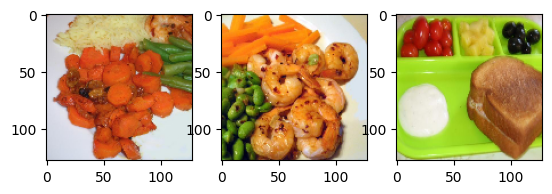

In [140]:
for i in range(3):   
    plt.subplot(1, 3, i+1)
    plt.imshow(test_image[i], cmap='binary')
    #plt.imshow(train_label[i], cmap='binary')
plt.show

In [143]:
test_label[10]

<tf.Tensor: shape=(128, 128, 11), dtype=float32, numpy=
array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0.

Объявление топологии нейронной сети

In [114]:
def unet_model(image_size, output_classes):

    #Входной слой
    input_layer = Input(shape=image_size + (3,))
    conv_1 = Conv2D(64, 4, activation=LeakyReLU(),
                                    strides=2, padding='same', kernel_initializer='glorot_normal',
                                    use_bias=False)(input_layer)
    #Сворачиваем
    conv_1_1 = Conv2D(128, 4, activation=LeakyReLU(), strides=2,
                                      padding='same', kernel_initializer='glorot_normal',
                                      use_bias=False)(conv_1)
    batch_norm_1 = BatchNormalization()(conv_1_1)

    #2
    conv_2 = Conv2D(256, 4, activation=LeakyReLU(), strides=2,
                                      padding='same', kernel_initializer='glorot_normal',
                                      use_bias=False)(batch_norm_1)
    batch_norm_2 = BatchNormalization()(conv_2)

    #3
    conv_3 = Conv2D(512, 4, activation=LeakyReLU(), strides=2,
                                      padding='same', kernel_initializer='glorot_normal',
                                      use_bias=False)(batch_norm_2)
    batch_norm_3 = BatchNormalization()(conv_3)

    #4
    conv_4 = Conv2D(512, 4, activation=LeakyReLU(), strides=2,
                                      padding='same', kernel_initializer='glorot_normal',
                                      use_bias=False)(batch_norm_3)
    batch_norm_4 = BatchNormalization()(conv_4)

    #5
    conv_5 = Conv2D(512, 4, activation=LeakyReLU(), strides=2,
                                      padding='same', kernel_initializer='glorot_normal',
                                      use_bias=False)(batch_norm_4)
    batch_norm_5 = BatchNormalization()(conv_5)

    #6
    conv_6 = Conv2D(512, 4, activation=LeakyReLU(), strides=2,
                                      padding='same', kernel_initializer='glorot_normal',
                                      use_bias=False)(batch_norm_5)


    #Разворачиваем
    #1
    up_1 = Concatenate()([Conv2DTranspose(512, 4, activation='relu', strides=2,
                                                                          padding='same',
                                                                          kernel_initializer='glorot_normal',
                                                                          use_bias=False)(conv_6), conv_5])
    batch_up_1 = BatchNormalization()(up_1)

    #Добавим Dropout от переобучения
    batch_up_1 = Dropout(0.25)(batch_up_1)

    #2
    up_2 = Concatenate()([Conv2DTranspose(512, 4, activation='relu', strides=2,
                                                                          padding='same',
                                                                          kernel_initializer='glorot_normal',
                                                                          use_bias=False)(batch_up_1), conv_4])
    batch_up_2 = BatchNormalization()(up_2)
    batch_up_2 = Dropout(0.25)(batch_up_2)




    #3
    up_3 = Concatenate()([Conv2DTranspose(512, 4, activation='relu', strides=2,
                                                                          padding='same',
                                                                          kernel_initializer='glorot_normal',
                                                                          use_bias=False)(batch_up_2), conv_3])
    batch_up_3 = BatchNormalization()(up_3)
    batch_up_3 = Dropout(0.25)(batch_up_3)




    #4
    up_4 = Concatenate()([Conv2DTranspose(256, 4, activation='relu', strides=2,
                                                                          padding='same',
                                                                          kernel_initializer='glorot_normal',
                                                                          use_bias=False)(batch_up_3), conv_2])
    batch_up_4 = BatchNormalization()(up_4)


    #5
    up_5 = Concatenate()([Conv2DTranspose(128, 4, activation='relu', strides=2,
                                                                          padding='same',
                                                                          kernel_initializer='glorot_normal',
                                                                          use_bias=False)(batch_up_4), conv_1_1])
    batch_up_5 = BatchNormalization()(up_5)


    #6
    up_6 = Concatenate()([Conv2DTranspose(64, 4, activation='relu', strides=2,
                                                                          padding='same',
                                                                          kernel_initializer='glorot_normal',
                                                                          use_bias=False)(batch_up_5), conv_1])
    batch_up_6 = BatchNormalization()(up_6)


    #Выходной слой
    output_layer = Conv2DTranspose(output_classes, 4, activation='sigmoid', strides=2,
                                                   padding='same',
                                                   kernel_initializer='glorot_normal')(batch_up_6)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [115]:
model = unet_model(image_size=IMG_SHAPE, output_classes=CLASSES)

In [116]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 64, 64,    │      3,072 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │    131,072 │ conv2d_14[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 16, 16,    │    524,288 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      1,024 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 8, 8, 512) │  2,097,152 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 512) │      2,048 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 4, 4, 512) │  4,194,304 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 512) │      2,048 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 2, 2, 512) │  4,194,304 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 2, 512) │      2,048 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 1, 1, 512) │  4,194,304 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_14 │ (None, 2, 2, 512) │  4,194,304 │ conv2d_20[0][0]   │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 2, 2,      │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 1024)             │            │ conv2d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 2,      │      4,096 │ concatenate_12[0… │
│ (BatchNormalizatio… │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 2, 2,      │          0 │ batch_normalizat… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_15 │ (None, 4, 4, 512) │  8,388,608 │ dropout_6[0][0]   │
│ (Conv2DTranspose)   │                   │            │                 

 Total params: 41,861,131 (159.69 MB)

 Trainable params: 41,849,355 (159.64 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [146]:
%%time
# Обучаем модель
history = model.fit(train_image, train_label, batch_size=3, epochs=5, validation_data=(test_image, test_label))

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.4643 - loss: 1.0871 - val_accuracy: 0.5201 - val_loss: 1.2334
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.3963 - loss: 1.0461 - val_accuracy: 0.6491 - val_loss: 0.9323
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.4762 - loss: 0.9003 - val_accuracy: 0.3646 - val_loss: 0.9138
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.5273 - loss: 0.8104 - val_accuracy: 0.6512 - val_loss: 0.6804
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.5660 - loss: 0.7277 - val_accuracy: 0.4457 - val_loss: 0.6691
CPU times: total: 1h 13min 53s
Wall time: 16min 12s


### Отрисовка точности модели (при обучении и на тестовых данных)

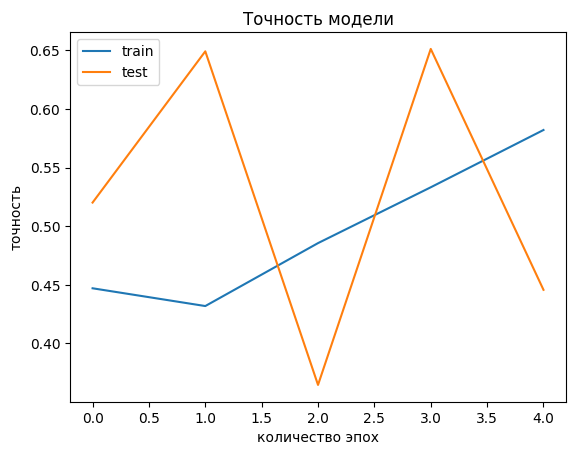

In [147]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [148]:
# Делаем сегментацию для двух тестовых картинок
out = model.predict(test_image[:2], batch_size=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


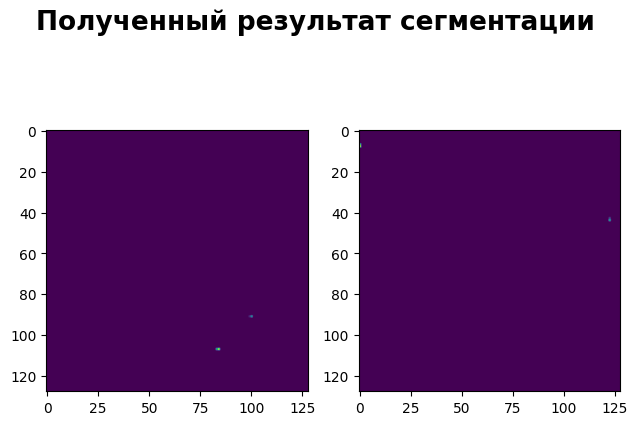

In [150]:
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(np.argmax(out[i], axis=-1))
plt.suptitle('Полученный результат сегментации', fontsize=19, fontweight='bold')
plt.tight_layout()
plt.show()

Вывод: Ставил перед собой задачу сегментации изображения на датасете с едой FoodSeg103. Очень много времени ушло на подготовку данных (видимо коряво получилось). В исследовании была использована модель с 6 урока. Во время обучения модель показывала неоднозначные результаты (очень большой разброс точности). Результат сегментации на тестовых картинках не дал успеха. Связываю неудачную работу этой модели с плохо подготовленными данными. Буду разбираться еще